# Wrangling of Supermarket Sales Project

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re
import json
import datetime
from bs4 import BeautifulSoup
import os
import io
import glob
import tweepy
from google.colab import drive
from tweepy import OAuthHandler
from timeit import default_timer as timer
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 1- Data Gathering

In [172]:
# reading .txt file downloaded manually.
df_1 = pd.read_csv('/content/Capstone_Data_Supermarket_Sales.csv')


In [173]:
df_1

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,A,1,0,0,Normal,Male,Health and beauty,74.69,7,26.1415,NaN,1/5/2019,13:08,Ewallet,9.1
1,226-31-3081,C,0,1,0,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,9.6
2,631-41-3108,A,1,0,0,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,7.4
3,123-19-1176,A,1,0,0,Normal,Male,Health and beauty,58.22,8,NaN,489.0480,1/27/2019,8 - 30 PM,Ewallet,8.4
4,373-73-7910,A,1,0,0,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,861-77-0145,C,0,1,0,Member,Male,Electronic accessories,81.97,10,40.9850,860.6850,3/3/2019,14:30,Cash,9.2
1002,479-26-8945,B,0,0,1,Member,Female,Sports and travel,16.49,2,1.6490,34.6290,2/5/2019,11:32,Ewallet,4.6
1003,210-67-5886,C,0,1,0,Member,Female,Health and beauty,98.21,3,14.7315,309.3615,2/5/2019,10:41,Credit card,7.8
1004,227-78-1148,B,0,0,1,Normal,Female,Fashion accessories,72.84,7,25.4940,535.3740,2/15/2019,12:44,Cash,8.4





## 2- Data Assessing

### 2-1- Tidiness issues

In [174]:
df_1

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,A,1,0,0,Normal,Male,Health and beauty,74.69,7,26.1415,NaN,1/5/2019,13:08,Ewallet,9.1
1,226-31-3081,C,0,1,0,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,9.6
2,631-41-3108,A,1,0,0,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,7.4
3,123-19-1176,A,1,0,0,Normal,Male,Health and beauty,58.22,8,NaN,489.0480,1/27/2019,8 - 30 PM,Ewallet,8.4
4,373-73-7910,A,1,0,0,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,861-77-0145,C,0,1,0,Member,Male,Electronic accessories,81.97,10,40.9850,860.6850,3/3/2019,14:30,Cash,9.2
1002,479-26-8945,B,0,0,1,Member,Female,Sports and travel,16.49,2,1.6490,34.6290,2/5/2019,11:32,Ewallet,4.6
1003,210-67-5886,C,0,1,0,Member,Female,Health and beauty,98.21,3,14.7315,309.3615,2/5/2019,10:41,Credit card,7.8
1004,227-78-1148,B,0,0,1,Normal,Female,Fashion accessories,72.84,7,25.4940,535.3740,2/15/2019,12:44,Cash,8.4


In [175]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1006 non-null   object 
 1   Branch         1006 non-null   object 
 2   Yangon         1006 non-null   int64  
 3   Naypyitaw      1006 non-null   int64  
 4   Mandalay       1006 non-null   int64  
 5   Customer type  1006 non-null   object 
 6   Gender         1006 non-null   object 
 7   Product line   1006 non-null   object 
 8   Unit price     1006 non-null   object 
 9   Quantity       1006 non-null   int64  
 10  Tax 5%         997 non-null    float64
 11  Total          1003 non-null   float64
 12  Date           1006 non-null   object 
 13  Time           1006 non-null   object 
 14  Payment        1006 non-null   object 
 15  Rating         1006 non-null   float64
dtypes: float64(3), int64(4), object(9)
memory usage: 125.9+ KB


##### 1- Each variable forms a column and contains values  :
- {'Yangon' , 'Naypyitaw' , 'Mandalay'} this column heders are dummy columns, not variable names we must be a melt them into one column his name 'City'.

##### 2- Each observation forms a row  :
- nothing.

##### 3- Each type of observational unit forms a table :
- nothing.



### 2-2- Quality issues

In [176]:
df_1

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,A,1,0,0,Normal,Male,Health and beauty,74.69,7,26.1415,NaN,1/5/2019,13:08,Ewallet,9.1
1,226-31-3081,C,0,1,0,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,9.6
2,631-41-3108,A,1,0,0,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,7.4
3,123-19-1176,A,1,0,0,Normal,Male,Health and beauty,58.22,8,NaN,489.0480,1/27/2019,8 - 30 PM,Ewallet,8.4
4,373-73-7910,A,1,0,0,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,861-77-0145,C,0,1,0,Member,Male,Electronic accessories,81.97,10,40.9850,860.6850,3/3/2019,14:30,Cash,9.2
1002,479-26-8945,B,0,0,1,Member,Female,Sports and travel,16.49,2,1.6490,34.6290,2/5/2019,11:32,Ewallet,4.6
1003,210-67-5886,C,0,1,0,Member,Female,Health and beauty,98.21,3,14.7315,309.3615,2/5/2019,10:41,Credit card,7.8
1004,227-78-1148,B,0,0,1,Normal,Female,Fashion accessories,72.84,7,25.4940,535.3740,2/15/2019,12:44,Cash,8.4


In [177]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1006 non-null   object 
 1   Branch         1006 non-null   object 
 2   Yangon         1006 non-null   int64  
 3   Naypyitaw      1006 non-null   int64  
 4   Mandalay       1006 non-null   int64  
 5   Customer type  1006 non-null   object 
 6   Gender         1006 non-null   object 
 7   Product line   1006 non-null   object 
 8   Unit price     1006 non-null   object 
 9   Quantity       1006 non-null   int64  
 10  Tax 5%         997 non-null    float64
 11  Total          1003 non-null   float64
 12  Date           1006 non-null   object 
 13  Time           1006 non-null   object 
 14  Payment        1006 non-null   object 
 15  Rating         1006 non-null   float64
dtypes: float64(3), int64(4), object(9)
memory usage: 125.9+ KB


In [178]:
for column in df_1.columns:
    print(f"Value counts for {column}:")
    print(df_1[column].value_counts().sort_index())
    print("\n" + "="*40 + "\n")


Value counts for Invoice ID:
Invoice ID
101-17-6199    1
101-81-4070    1
102-06-2002    1
102-77-2261    1
105-10-6182    1
              ..
894-41-5205    1
895-03-6665    1
895-66-0685    1
896-34-0956    1
898-04-2717    1
Name: count, Length: 1000, dtype: int64


Value counts for Branch:
Branch
A    341
B    334
C    331
Name: count, dtype: int64


Value counts for Yangon:
Yangon
0    665
1    341
Name: count, dtype: int64


Value counts for Naypyitaw:
Naypyitaw
0    675
1    331
Name: count, dtype: int64


Value counts for Mandalay:
Mandalay
0    672
1    334
Name: count, dtype: int64


Value counts for Customer type:
Customer type
-           27
Member     463
Memberr      1
Normal     515
Name: count, dtype: int64


Value counts for Gender:
Gender
Female    481
Male      525
Name: count, dtype: int64


Value counts for Product line:
Product line
Electronic accessories    171
Fashion accessories       179
Food and beverages        175
Health and beauty         153
Home and lifes

In [179]:
df_1[df_1.isnull().any(axis=1)]

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,A,1,0,0,Normal,Male,Health and beauty,74.69,7,26.1415,NaN,1/5/2019,13:08,Ewallet,9.1
3,123-19-1176,A,1,0,0,Normal,Male,Health and beauty,58.22,8,NaN,489.0480,1/27/2019,8 - 30 PM,Ewallet,8.4
8,665-32-9167,A,1,0,0,Normal,Male,Health and beauty,36.26,2,NaN,76.1460,1/10/2019,17:15,Credit card,7.2
14,829-34-3910,A,1,0,0,Normal,Male,Health and beauty,71.38,10,35.6900,NaN,3/29/2019,19:21,Cash,5.7
37,272-65-1806,A,1,0,0,Normal,Male,Electronic accessories,60.88,9,27.3960,NaN,1/15/2019,17:17,Ewallet,4.7
86,362-58-8315,C,0,1,0,Normal,Male,Fashion accessories,76.52,5,NaN,401.7300,3/25/2019,10:23,Cash,9.9
92,873-51-0671,A,1,0,0,Member,Female,Sports and travel,21.98,7,NaN,161.5530,1/10/2019,16:42,Ewallet,5.1
97,871-39-9221,C,0,1,0,Normal,Female,Electronic accessories,12.45 USD,6,NaN,78.4350,2/9/2019,13:11,Cash,4.1
629,308-39-1707,A,1,0,0,Normal,Female,Fashion accessories,12.09 USD,-1,NaN,12.6945,1/26/2019,18:19,Credit card,8.2
830,237-44-6163,A,1,0,0,Normal,Male,Electronic accessories,10.56 USD,-8,NaN,88.7040,1/24/2019,17:43,Cash,7.6


In [180]:
# Search for all records that contain the value '-' in any column

df_1[df_1.isin(['-']).any(axis=1)]


,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
46,370-41-7321,B,0,0,1,-,Male,Health and beauty,56.69,9,25.5105,535.7205,2/27/2019,17:24,Credit card,8.4
47,727-46-3608,B,0,0,1,-,Male,Food and beverages,20.01,9,9.0045,189.0945,2/6/2019,15:47,Ewallet,4.1
48,669-54-1719,B,0,0,1,-,Male,Electronic accessories,18.93,6,5.6790,119.2590,2/10/2019,12:45,Credit card,8.1
49,574-22-5561,C,0,1,0,-,Female,Fashion accessories,82.63,10,41.3150,867.6150,3/19/2019,17:08,Ewallet,7.9
50,326-78-5178,C,0,1,0,-,Male,Food and beverages,91.4,7,31.9900,671.7900,2/3/2019,10:19,Cash,9.5
51,162-48-8011,A,1,0,0,-,Female,Food and beverages,44.59,5,11.1475,234.0975,2/10/2019,15:10,Cash,8.5
52,616-24-2851,B,0,0,1,-,Female,Fashion accessories,17.87,4,3.5740,75.0540,3/22/2019,14:42,Ewallet,6.5
53,778-71-5554,C,0,1,0,-,Male,Fashion accessories,15.43,1,0.7715,16.2015,1/25/2019,15:46,Credit card,6.1
54,242-55-6721,B,0,0,1,-,Male,Home and lifestyle,16.16,2,1.6160,33.9360,3/7/2019,11:49,Ewallet,6.5
55,399-46-5918,C,0,1,0,-,Female,Electronic accessories,85.98,8,34.3920,722.2320,2/28/2019,19:01,Cash,8.2


In [181]:
# Replace '-' with NaN and then convert to float, handling missing values
# Handle errors by ignoring them
# Alternatively, you can fill missing values with a specific number:
# df_1_cleaned = df_1.replace('-', pd.NA).fillna(0).astype(float)  # Fill missing values with 0

df_1_exp = df_1.replace('-', pd.NA).astype(float, errors='ignore')


df_1_exp.describe()

,Yangon,Naypyitaw,Mandalay,Quantity,Tax 5%,Total,Rating
count,1006.000000,1006.000000,1006.000000,1006.000000,997.000000,1003.000000,1006.000000
mean,0.338966,0.329026,0.332008,5.469185,15.479682,322.734689,7.056163
std,0.473594,0.470093,0.471168,3.014153,11.728320,245.865964,3.318751
min,0.000000,0.000000,0.000000,-8.000000,0.508500,10.678500,4.000000
25%,0.000000,0.000000,0.000000,3.000000,5.986500,123.789750,5.500000
50%,0.000000,0.000000,0.000000,5.000000,12.227500,254.016000,7.000000
75%,1.000000,1.000000,1.000000,8.000000,22.720500,471.009000,8.500000
max,1.000000,1.000000,1.000000,10.000000,49.650000,1042.650000,97.000000


In [182]:
df_1.duplicated().sum()

6

In [183]:
df_1[df_1.duplicated()]

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
1000,588-01-7461,C,0,1,0,Normal,Female,Food and beverages,33.98,9,15.2910,321.1110,3/24/2019,10:43,Cash,4.2
1001,861-77-0145,C,0,1,0,Member,Male,Electronic accessories,81.97,10,40.9850,860.6850,3/3/2019,14:30,Cash,9.2
1002,479-26-8945,B,0,0,1,Member,Female,Sports and travel,16.49,2,1.6490,34.6290,2/5/2019,11:32,Ewallet,4.6
1003,210-67-5886,C,0,1,0,Member,Female,Health and beauty,98.21,3,14.7315,309.3615,2/5/2019,10:41,Credit card,7.8
1004,227-78-1148,B,0,0,1,Normal,Female,Fashion accessories,72.84,7,25.4940,535.3740,2/15/2019,12:44,Cash,8.4
1005,645-44-1170,A,1,0,0,Member,Male,Home and lifestyle,58.07,9,26.1315,548.7615,1/19/2019,20:07,Ewallet,4.3


##### 1- Columns Name  :
- {'Invoice ID' , 'Customer type' , 'Product line' , 'Unit price' , 'Tax 5%'} this column names contains ' ' must be replace to '_'.

##### 2- Validity :
- in column {'Unit price'} incorrect typing we must be a remove 'USD' by replace 'USD' to ''.
- in column {'Unit price'} incorrect data type we must be a float data type.
- in column {'Quantity'} incorrect -ve numeric data we must be a +ve numeric data.

##### 3- Completeness  :
- in column {'Customer Type'} Trivial data we must be a replace '-' to 'Normal'.
- in this columns {'Tax 5%' , 'Total'} not completed calculated columns, we must be a recalculate them.

##### 4- Accuracy :
- in column {'Customer Type'} incorrect typing we must be a replace 'memberr' to 'member'.
- in column {'Rating'} incorrect becouse of the Rating in range 0 to 10 we must be a replace '97' to '9.7'.

##### 5- Consistency :
- in column {'Date'} formatted by {mm.dd.yyyy} we must be replace to {dd.mm.yyyy}.
- in column {'Time'} some record formatted by {hh-mm XM} we must be replace to {hh:mm}.
- in column {'Invoice ID'} Duplicate data we must be a Remove Duplicate.


## 3- Data Cleaning

In [184]:
# making a copy fromthe dataframe
df_1_clean = df_1.copy()
df_1_clean

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,A,1,0,0,Normal,Male,Health and beauty,74.69,7,26.1415,NaN,1/5/2019,13:08,Ewallet,9.1
1,226-31-3081,C,0,1,0,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,9.6
2,631-41-3108,A,1,0,0,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,7.4
3,123-19-1176,A,1,0,0,Normal,Male,Health and beauty,58.22,8,NaN,489.0480,1/27/2019,8 - 30 PM,Ewallet,8.4
4,373-73-7910,A,1,0,0,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,861-77-0145,C,0,1,0,Member,Male,Electronic accessories,81.97,10,40.9850,860.6850,3/3/2019,14:30,Cash,9.2
1002,479-26-8945,B,0,0,1,Member,Female,Sports and travel,16.49,2,1.6490,34.6290,2/5/2019,11:32,Ewallet,4.6
1003,210-67-5886,C,0,1,0,Member,Female,Health and beauty,98.21,3,14.7315,309.3615,2/5/2019,10:41,Credit card,7.8
1004,227-78-1148,B,0,0,1,Normal,Female,Fashion accessories,72.84,7,25.4940,535.3740,2/15/2019,12:44,Cash,8.4


### 3-1 Fixing Tidiness issues

#### 3-1-1 Each variable forms a column and contains values




##### A- Define :



* {'Yangon' , 'Naypyitaw' , 'Mandalay'} this column heders are dummy columns, not variable names we must be a melt them into one column his name 'City'.


##### B- Code :
    

In [185]:
# Melt the 'Yangon', 'Naypyitaw', and 'Mandalay' columns
df_1_clean = pd.melt(df_1_clean, id_vars=['Invoice ID', 'Branch', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Date', 'Time', 'Payment', 'Rating' , 'Tax 5%' , 'Total'],
                    value_vars=['Yangon', 'Naypyitaw', 'Mandalay'],
                    var_name='City', value_name='Value')
# remove '0's in Value column
df_1_clean = df_1_clean[df_1_clean['Value'] != 0]


In [186]:
# drop Value column
df_1_clean.drop(['Value'], axis=1, inplace=True)

##### C- Test :

In [187]:
df_1_clean

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Tax 5%,Total,City
0,750-67-8428,A,Normal,Male,Health and beauty,74.69,7,1/5/2019,13:08,Ewallet,9.1,26.1415,NaN,Yangon
2,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23,Credit card,7.4,16.2155,340.5255,Yangon
3,123-19-1176,A,Normal,Male,Health and beauty,58.22,8,1/27/2019,8 - 30 PM,Ewallet,8.4,NaN,489.0480,Yangon
4,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37,Ewallet,5.3,30.2085,634.3785,Yangon
6,355-53-5943,A,Normal,Male,Electronic accessories,68.84,6,2/25/2019,14:36,Ewallet,5.8,20.6520,433.6920,Yangon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3003,602-16-6955,B,Normal,Female,Sports and travel,76.6,10,1/24/2019,18:10,Ewallet,6.0,38.3000,804.3000,Mandalay
3005,690-01-6631,B,Normal,Male,Fashion accessories,17.49,10,2/22/2019,18:35,Ewallet,6.6,8.7450,183.6450,Mandalay
3008,303-96-2227,B,Normal,Female,Home and lifestyle,97.38,10,3/2/2019,17:16,Ewallet,4.4,48.6900,1022.4900,Mandalay
3014,479-26-8945,B,Member,Female,Sports and travel,16.49,2,2/5/2019,11:32,Ewallet,4.6,1.6490,34.6290,Mandalay


### 3-2 Fixing Quality Issues

#### 3-2-1 Columns Name :

##### A- Define :

* {'Invoice ID' , 'Customer type' , 'Product line' , 'Unit price' , 'Tax 5%'} this column names contains ' ' must be replace to '_'.

##### B- Code :
    

In [188]:
df_1_clean.columns = df_1_clean.columns.str.replace(' ', '_')


##### C- Test :

In [189]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1006 entries, 0 to 3016
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice_ID     1006 non-null   object 
 1   Branch         1006 non-null   object 
 2   Customer_type  1006 non-null   object 
 3   Gender         1006 non-null   object 
 4   Product_line   1006 non-null   object 
 5   Unit_price     1006 non-null   object 
 6   Quantity       1006 non-null   int64  
 7   Date           1006 non-null   object 
 8   Time           1006 non-null   object 
 9   Payment        1006 non-null   object 
 10  Rating         1006 non-null   float64
 11  Tax_5%         997 non-null    float64
 12  Total          1003 non-null   float64
 13  City           1006 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 150.2+ KB


#### 3-2-2 Validity :

##### A- Define :
* in column {'Unit price'} incorrect typing we must be a remove 'USD' by replace 'USD' to ''.

##### B- Code :
    

In [190]:
# Remove any non-numeric characters from the 'Unit_price' column
df_1_clean['Unit_price'] = df_1_clean['Unit_price'].str.replace(r'[^\d.]', '', regex=True)

#### C-Test:

In [191]:
 # Check if there are any '-' values in the DataFrame
df_1_clean.isin([' USD']).any(axis=0).sum()

0

##### A- Define :
* in column {'Unit price'} incorrect data type we must be a float data type.

##### B- Code :
    

In [192]:
# Convert the 'Unit_price' column to float
df_1_clean['Unit_price'] = df_1_clean['Unit_price'].astype(float)

#### C-Test:

In [193]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1006 entries, 0 to 3016
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice_ID     1006 non-null   object 
 1   Branch         1006 non-null   object 
 2   Customer_type  1006 non-null   object 
 3   Gender         1006 non-null   object 
 4   Product_line   1006 non-null   object 
 5   Unit_price     1006 non-null   float64
 6   Quantity       1006 non-null   int64  
 7   Date           1006 non-null   object 
 8   Time           1006 non-null   object 
 9   Payment        1006 non-null   object 
 10  Rating         1006 non-null   float64
 11  Tax_5%         997 non-null    float64
 12  Total          1003 non-null   float64
 13  City           1006 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 150.2+ KB


##### A- Define :
* in column {'Unit price'} incorrect data type we must be a float data type.

##### B- Code :
    

In [194]:
# Convert the 'Unit_price' column to float
df_1_clean['Unit_price'] = df_1_clean['Unit_price'].astype(float)

#### C-Test:

In [195]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1006 entries, 0 to 3016
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice_ID     1006 non-null   object 
 1   Branch         1006 non-null   object 
 2   Customer_type  1006 non-null   object 
 3   Gender         1006 non-null   object 
 4   Product_line   1006 non-null   object 
 5   Unit_price     1006 non-null   float64
 6   Quantity       1006 non-null   int64  
 7   Date           1006 non-null   object 
 8   Time           1006 non-null   object 
 9   Payment        1006 non-null   object 
 10  Rating         1006 non-null   float64
 11  Tax_5%         997 non-null    float64
 12  Total          1003 non-null   float64
 13  City           1006 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 150.2+ KB


##### A- Define :
* in column {'Quantity'} incorrect -ve numeric data we must be a +ve numeric data.

##### B- Code :
    

In [196]:
# Convert the '-ve' value to '+ve'
df_1_clean['Quantity'] = df_1_clean['Quantity'].abs()

#### C-Test:

In [197]:
df_1_clean['Quantity'].value_counts().sort_index()

,count
Quantity,
1,112
2,92
3,91
4,109
5,102
6,98
7,103
8,85
9,94


#### 3-2-3 Completeness :

##### A- Define :

* in column {'Customer Type'} Trivial data we must be a replace '-' to 'Normal'.








##### B- Code :
    

In [198]:
df_1_clean['Customer_type'].replace('-', 'Normal', inplace=True)

##### C- Test:

In [199]:
 # Check if there are any '-' values in the DataFrame
df_1_clean.isin(['-']).any(axis=0).sum()

0

##### A- Define :



> Add blockquote



* in this columns {'Tax 5%' , 'Total'} not completed calculated columns, we must be a recalculate them.

##### B- Code :
    

In [200]:
df_1_clean['Tax_5%'] = df_1_clean['Unit_price']*df_1_clean['Quantity']*0.05

In [201]:
df_1_clean['Total'] = df_1_clean['Unit_price'] * df_1_clean['Quantity'] + df_1_clean['Tax_5%']

##### C- Test :

In [202]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1006 entries, 0 to 3016
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice_ID     1006 non-null   object 
 1   Branch         1006 non-null   object 
 2   Customer_type  1006 non-null   object 
 3   Gender         1006 non-null   object 
 4   Product_line   1006 non-null   object 
 5   Unit_price     1006 non-null   float64
 6   Quantity       1006 non-null   int64  
 7   Date           1006 non-null   object 
 8   Time           1006 non-null   object 
 9   Payment        1006 non-null   object 
 10  Rating         1006 non-null   float64
 11  Tax_5%         1006 non-null   float64
 12  Total          1006 non-null   float64
 13  City           1006 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 150.2+ KB


#### 3-2-4 Accuracy  :

##### A- Define :
* in column {'Customer Type'} incorrect typing we must be a replace 'Memberr' to 'Member'.

##### B- Code :
    

In [203]:
df_1_clean['Customer_type'] = df_1_clean['Customer_type'].str.replace(r'Memberr', 'Member', regex=True)

#### C-Test:

In [204]:
df_1_clean['Customer_type'].value_counts().sort_index()

,count
Customer_type,
Member,464
Normal,542


##### A- Define :
* in column {'Rating'} incorrect becouse of the Rating in range 0 to 10 we must be a replace '97' to '9.7'.

##### B- Code :
    

In [205]:
df_1_clean['Rating'] = df_1_clean['Rating'].replace(97, 9.7)

#### C-Test:

In [206]:
df_1_clean['Rating'].value_counts().sort_index()

,count
Rating,
4.0,11
4.1,17
4.2,23
4.3,19
4.4,17
...,...
9.6,17
9.7,14
9.8,19


#### 3-2-5 Consistency :

##### A- Define :
* in column {'Date'} formatted by {mm.dd.yyyy} we must be replace to {dd.mm.yyyy}.

##### B- Code :
    

In [207]:
# Convert the 'Date' column to datetime, specifying the correct format
df_1_clean['Date'] = pd.to_datetime(df_1_clean['Date'], format='%m/%d/%Y') # Changed the format to month/day/year

#### C-Test:

In [208]:
df_1_clean['Date'].value_counts().sort_index()

,count
Date,
2019-01-01,12
2019-01-02,8
2019-01-03,8
2019-01-04,6
2019-01-05,12
...,...
2019-03-26,13
2019-03-27,10
2019-03-28,10


##### A- Define :
* in column {'Time'} some record formatted by {hh-mm XM} we must be replace to {hh:mm}.

##### B- Code :
    

In [209]:
# Remove ' XM' and replace ' : ' with ':'
df_1_clean['Time'] = df_1_clean['Time'].str.replace('8 - 30 PM', '20:30')


In [210]:
# Convert the 'Time' column to datetime (assuming 24-hour format)
df_1_clean['Time'] = pd.to_datetime(df_1_clean['Time'], format='%H:%M').dt.time

#### C-Test:

In [211]:
df_1_clean['Time'].value_counts().sort_index()

,count
Time,
10:00:00,3
10:01:00,2
10:02:00,3
10:03:00,1
10:04:00,1
...,...
20:52:00,1
20:54:00,2
20:55:00,1


##### A- Define :
* in column {'Invoice ID'} Duplicate data we must be a Remove Duplicate.

##### B- Code :
    

In [212]:
df_1_clean.drop_duplicates(subset='Invoice_ID', inplace=True)


#### C-Test:

In [213]:
df_1_clean.duplicated().sum()

0

_______________________________________________________________________________________________________________________________

## 4- Data Storing  

In [214]:
df_1_clean.to_csv('cleaned_Capstone_Data_Supermarket_Sales.csv')

## 5- Data Insight

In [215]:
df_1_insight = df_1_clean.copy()
df_1_insight

,Invoice_ID,Branch,Customer_type,Gender,Product_line,Unit_price,Quantity,Date,Time,Payment,Rating,Tax_5%,Total,City
0,750-67-8428,A,Normal,Male,Health and beauty,74.69,7,2019-01-05,13:08:00,Ewallet,9.1,26.1415,548.9715,Yangon
2,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,2019-03-03,13:23:00,Credit card,7.4,16.2155,340.5255,Yangon
3,123-19-1176,A,Normal,Male,Health and beauty,58.22,8,2019-01-27,20:30:00,Ewallet,8.4,23.2880,489.0480,Yangon
4,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,2019-02-08,10:37:00,Ewallet,5.3,30.2085,634.3785,Yangon
6,355-53-5943,A,Normal,Male,Electronic accessories,68.84,6,2019-02-25,14:36:00,Ewallet,5.8,20.6520,433.6920,Yangon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999,552-44-5977,B,Member,Male,Health and beauty,62.00,8,2019-01-03,19:08:00,Credit card,6.2,24.8000,520.8000,Mandalay
3001,430-53-4718,B,Member,Male,Health and beauty,75.37,8,2019-01-28,15:46:00,Credit card,8.4,30.1480,633.1080,Mandalay
3003,602-16-6955,B,Normal,Female,Sports and travel,76.60,10,2019-01-24,18:10:00,Ewallet,6.0,38.3000,804.3000,Mandalay
3005,690-01-6631,B,Normal,Male,Fashion accessories,17.49,10,2019-02-22,18:35:00,Ewallet,6.6,8.7450,183.6450,Mandalay


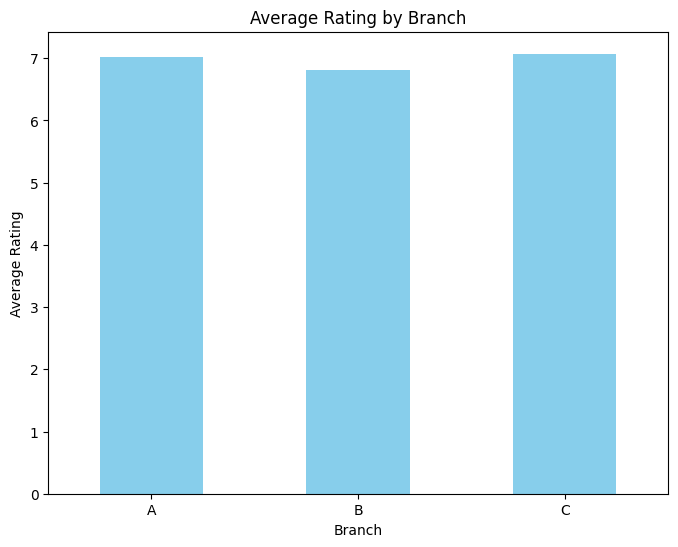

In [216]:
avg_rating_by_branch = df_1_insight.groupby('Branch')['Rating'].mean()

# Plot the bar chart
plt.figure(figsize=(8, 6))
avg_rating_by_branch.plot(kind='bar', color='skyblue')
plt.xlabel('Branch')
plt.ylabel('Average Rating')
plt.title('Average Rating by Branch')
plt.xticks(rotation=0)
plt.show()

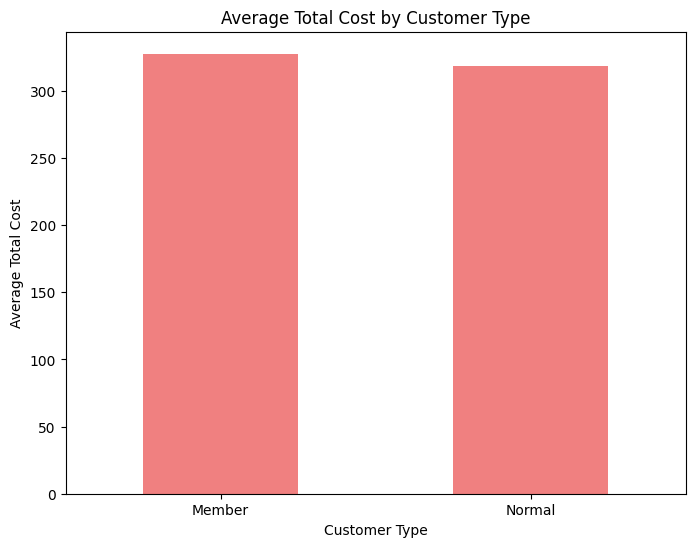

In [217]:
avg_total_cost_by_customer_type = df_1_insight.groupby('Customer_type')['Total'].mean()

# Plot the bar chart
plt.figure(figsize=(8, 6))
avg_total_cost_by_customer_type.plot(kind='bar', color='lightcoral')
plt.xlabel('Customer Type')
plt.ylabel('Average Total Cost')
plt.title('Average Total Cost by Customer Type')
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='Gender'>

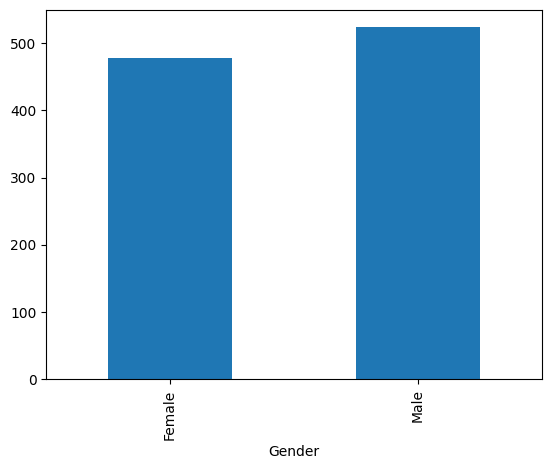

In [218]:
df_1_insight['Gender'].value_counts().sort_index().plot.bar()

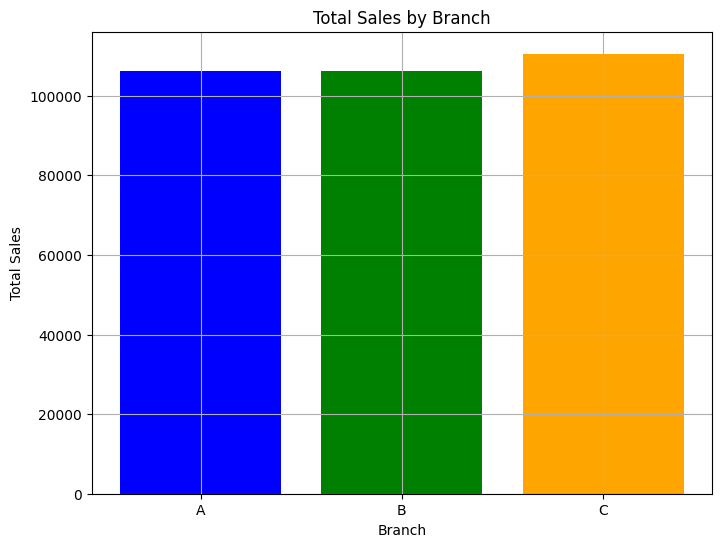

In [219]:
total_sales_by_branch = df_1_insight.groupby('Branch')['Total'].sum().reset_index()

# Plotting a bar chart for Total Sales vs Branch
plt.figure(figsize=(8,6))
plt.bar(total_sales_by_branch['Branch'], total_sales_by_branch['Total'], color=['blue', 'green', 'orange'])
plt.title('Total Sales by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [220]:
# Extract the hour from the 'Time' column
df_1_insight['Hour'] = df_1_insight['Time'].astype(str).str.split(':').str[0]
# Count the number of users for each hour
User_Count = df_1_insight['Hour'].value_counts().sort_index()

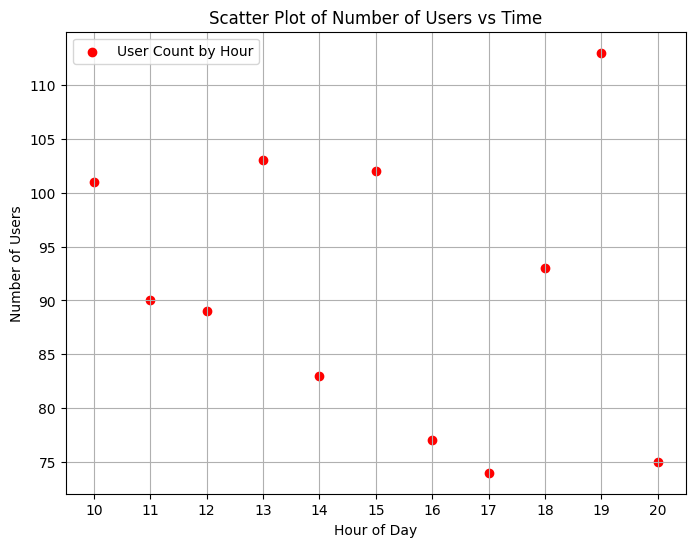

In [221]:
user_count_by_hour = df_1_insight.groupby('Hour').size().reset_index(name='User_Count')

plt.figure(figsize=(8,6))
plt.scatter(user_count_by_hour['Hour'], user_count_by_hour['User_Count'], c='red', label='User Count by Hour')
plt.title('Scatter Plot of Number of Users vs Time')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Users')
plt.grid(True)
plt.legend()
plt.show()

In [222]:
df_1_insight['Date'] = pd.to_datetime(df_1_insight['Date'], dayfirst=False)

df_1_insight['Day_of_Week'] = df_1_insight['Date'].dt.day_name()

product_sales = df_1_insight.groupby('Product_line')['Total'].sum().reset_index()

winning_product = product_sales.sort_values(by='Total', ascending=False)

print(winning_product)


             Product_line       Total
2      Food and beverages  56144.8440
5       Sports and travel  55122.8265
0  Electronic accessories  54337.5315
1     Fashion accessories  54305.8950
4      Home and lifestyle  53861.9130
3       Health and beauty  49193.7390


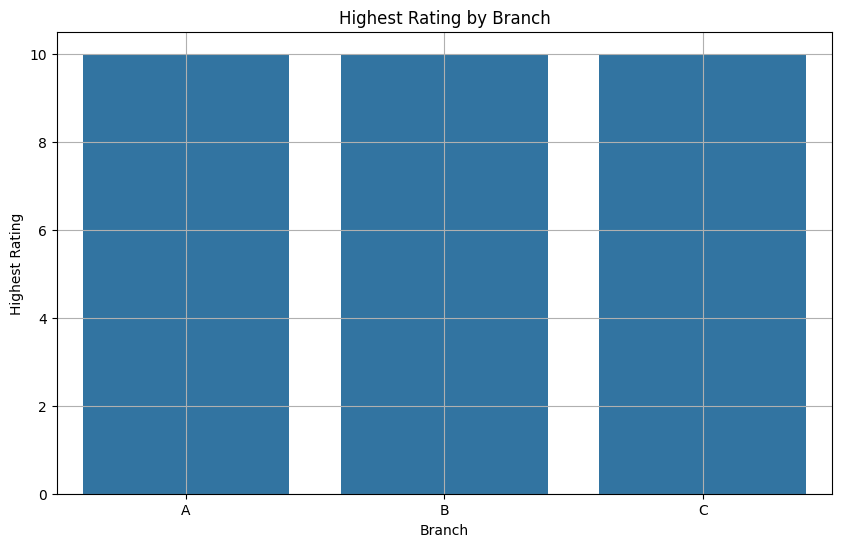

Branch with the highest rating is: A with a rating of 10.0


In [223]:
highest_rating_branch = df_1_insight.groupby('Branch')['Rating'].max().reset_index()

# Plot the branch with the highest rating
plt.figure(figsize=(10, 6))
sns.barplot(x='Branch', y='Rating', data=highest_rating_branch)
plt.title('Highest Rating by Branch')
plt.xlabel('Branch')
plt.ylabel('Highest Rating')
plt.grid(True)
plt.show()

# Print the branch with the highest rating
highest_branch = highest_rating_branch.loc[highest_rating_branch['Rating'].idxmax()]
print(f"Branch with the highest rating is: {highest_branch['Branch']} with a rating of {highest_branch['Rating']}")


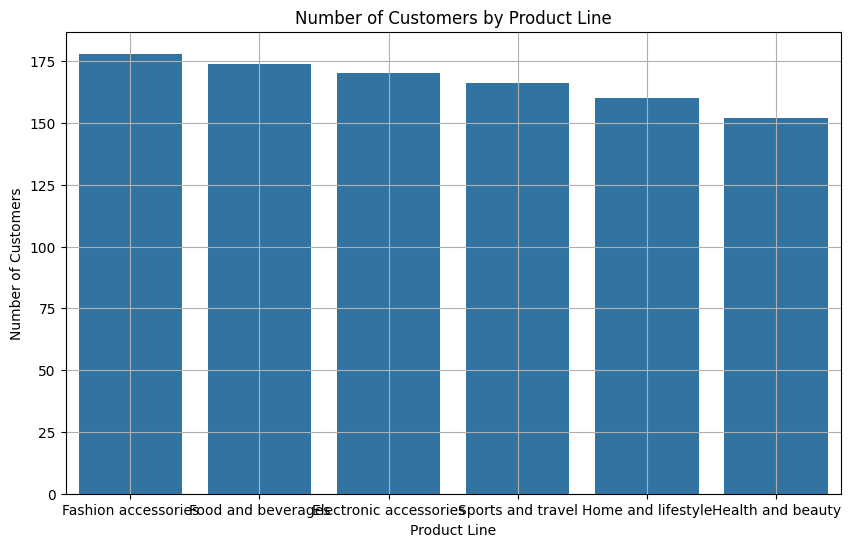

In [224]:
# Count the number of transactions per product line
product_line_counts = df_1_insight['Product_line'].value_counts().reset_index()
product_line_counts.columns = ['Product_line', 'Number_of_Customers']

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Product_line', y='Number_of_Customers', data=product_line_counts)
plt.title('Number of Customers by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

Winning Product based on Total Sales:
             Product_line       Total
2      Food and beverages  56144.8440
5       Sports and travel  55122.8265
0  Electronic accessories  54337.5315
1     Fashion accessories  54305.8950
4      Home and lifestyle  53861.9130
3       Health and beauty  49193.7390


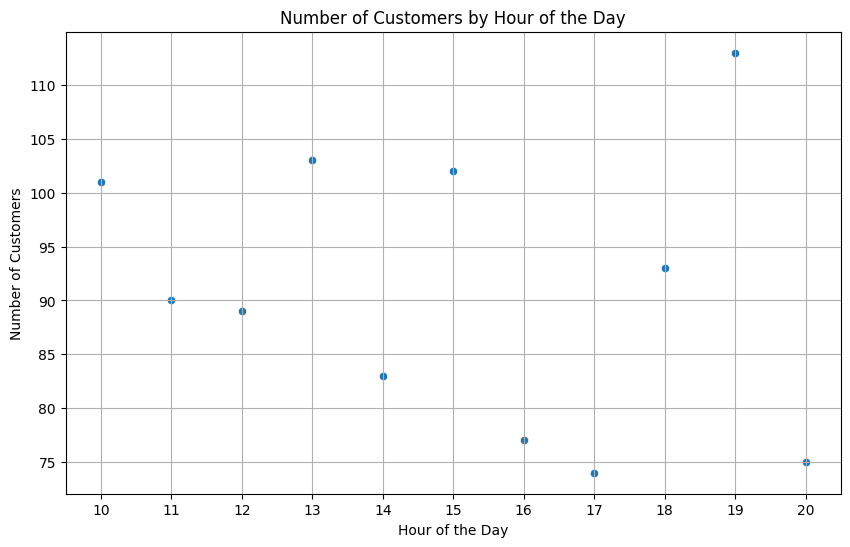

Lowest number of customers is at hour: 17


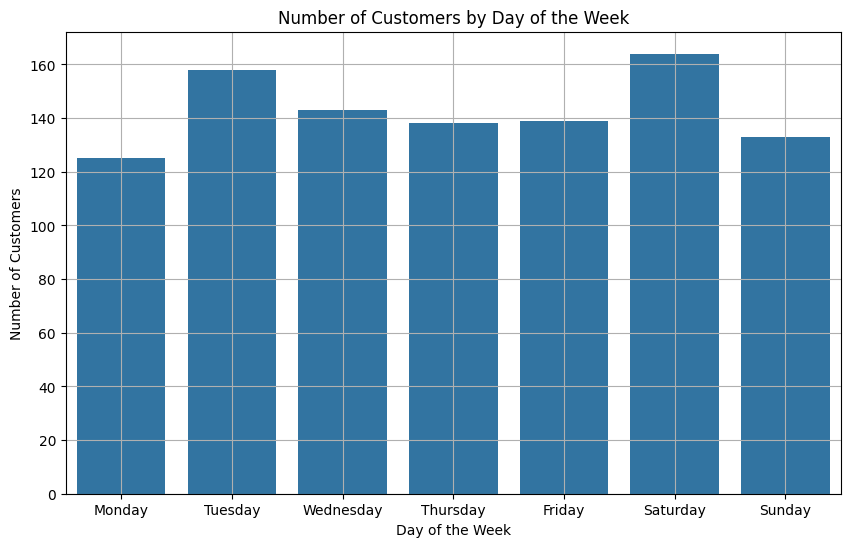

Lowest number of customers is on: Monday


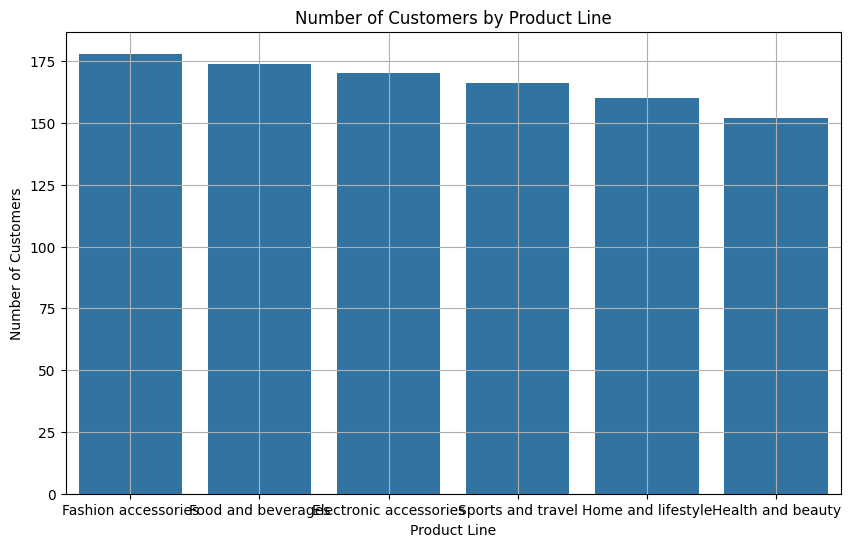

In [225]:
df_1_insight['Date'] = pd.to_datetime(df_1_insight['Date'], format='%m/%d/%Y')

df_1_insight['Day_of_Week'] = df_1_insight['Date'].dt.day_name()

product_sales = df_1_insight.groupby('Product_line')['Total'].sum().reset_index()

# Sort products by total sales in descending order
winning_product = product_sales.sort_values(by='Total', ascending=False)
print("Winning Product based on Total Sales:")
print(winning_product)

#  4: Scatter Plot Between Time and Number of Customers
hourly_customers = df_1_insight.groupby('Hour').size().reset_index(name='Number_of_Customers')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hour', y='Number_of_Customers', data=hourly_customers)
plt.title('Number of Customers by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

# Find the hour with the lowest number of customers
lowest_hour = hourly_customers.sort_values(by='Number_of_Customers').iloc[0]
print(f"Lowest number of customers is at hour: {lowest_hour['Hour']}")

#  6: Diagram for Lowest Customer Days
daily_customers = df_1_insight.groupby('Day_of_Week').size().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index(name='Number_of_Customers')

plt.figure(figsize=(10, 6))
sns.barplot(x='Day_of_Week', y='Number_of_Customers', data=daily_customers)
plt.title('Number of Customers by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

# Find the day with the lowest number of customers
lowest_day = daily_customers.sort_values(by='Number_of_Customers').iloc[0]
print(f"Lowest number of customers is on: {lowest_day['Day_of_Week']}")

# 7: Diagram for Product Line Purchases
product_line_counts = df_1_insight['Product_line'].value_counts().reset_index()
product_line_counts.columns = ['Product_line', 'Number_of_Customers']

plt.figure(figsize=(10, 6))
sns.barplot(x='Product_line', y='Number_of_Customers', data=product_line_counts)
plt.title('Number of Customers by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()
